# Building Convolutional Neural Network using NumPy from Scratch

# Imports

In [2]:
import skimage.data
import matplotlib.pyplot as plt
import numpy as np

# Read Data

In [3]:
img = skimage.data.chelsea()
img = skimage.color.rgb2gray(img)

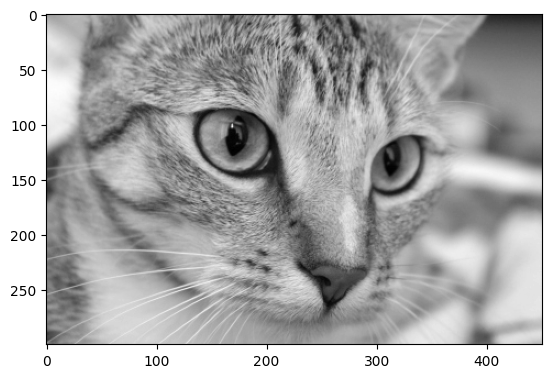

In [4]:
def plot_image(img):
    plt.imshow(img, cmap='gray')
    plt.show()

plot_image(img)

# Conv Layer

In [5]:
def conv_(img, conv_filter):  
    filter_size = conv_filter.shape[0]  
    result = np.zeros((img.shape))  
    
    for r in np.uint16(np.arange(filter_size/2, img.shape[0]-filter_size/2-2)):  
        for c in np.uint16(np.arange(filter_size/2, img.shape[1]-filter_size/2-2)):  
            #Getting the current region to get multiplied with the filter.  
            curr_region = img[r:r+filter_size, c:c+filter_size]  
            #Element-wise multipliplication between the current region and the filter.  
            curr_result = curr_region * conv_filter  
            conv_sum = np.sum(curr_result) #Summing the result of multiplication.  
            result[r, c] = conv_sum #Saving the summation in the convolution layer feature map.  
           
    #Clipping the outliers of the result matrix.  
    final_result = result[np.uint16(filter_size/2) : result.shape[0] - np.uint16(filter_size/2),   
                          np.uint16(filter_size/2) : result.shape[1] - np.uint16(filter_size/2)]  
    
    return final_result  

In [6]:
def conv(img, conv_filter):
    try: 
        if(len(img.shape) > 2 or len(conv_filter.shape) > 3):
            assert img.shape[-1] == conv_filter.shape[-1], \
            "Error: Number of channels in both image and filter must match."
        assert conv_filter.shape[1] == conv_filter.shape[2], \
            "Error: Filter must be a square matrix. I.e. number of rows and columns must match."
        assert conv_filter.shape[1]%2 != 0, \
            "Error: Filter must have an odd size. I.e. number of rows and columns must be odd."
    
    except AssertionError as msg:
        print(msg)
        return

    # An empty feature map to hold the output of convolving the filter(s) with the image.  
    feature_maps = np.zeros((
        img.shape[0] - conv_filter.shape[1] + 1,         # because we made we its a square matrix
        img.shape[1] - conv_filter.shape[1] + 1,         # otherwise we had to subtract row/column separetly
        conv_filter.shape[0]
    ))  
    
    for filter_num in range(conv_filter.shape[0]):
        print("Filter ", filter_num + 1)  
        curr_filter = conv_filter[filter_num, :]  
        """  
        Checking if there are mutliple channels for the single filter. 
        If so, then each channel will convolve the image. 
        The result of all convolutions are summed to return a single feature map. 
        """  
        
        if len(curr_filter.shape) > 2:  
            conv_map = conv_(img[:, :, 0], curr_filter[:, :, 0]) # Array holding the sum of all feature maps.  
            for ch_num in range(1, curr_filter.shape[-1]): # Convolving each channel with the image and summing the results.  
                conv_map = conv_map + conv_(img[:, :, ch_num], curr_filter[:, :, ch_num])  
        
        else: # There is just a single channel in the filter.  
            conv_map = conv_(img, curr_filter)  
        
        feature_maps[:, :, filter_num] = conv_map # Holding feature map with the current filter.
    
    return feature_maps

# ReLU

In [7]:
def relu(feature_map):  
    relu_out = np.zeros(feature_map.shape)  

    for map_num in range(feature_map.shape[-1]):  
        for r in np.arange(0,feature_map.shape[0]):  
            for c in np.arange(0, feature_map.shape[1]):  
                relu_out[r, c, map_num] = np.max(feature_map[r, c, map_num], 0)  

    return relu_out

# MaxPooling

In [8]:
def pooling(feature_map, size=2, stride=2):  
    pool_out = np.zeros((
        np.uint16((feature_map.shape[0]-size+1)/stride),
        np.uint16((feature_map.shape[1]-size+1)/stride), 
        feature_map.shape[-1]
    ))  
    
    for map_num in range(feature_map.shape[-1]):  
        r2 = 0  
        for r in np.arange(0,feature_map.shape[0]-size-1, stride):  
            c2 = 0  
            for c in np.arange(0, feature_map.shape[1]-size-1, stride):  
                pool_out[r2, c2, map_num] = np.max(feature_map[r:r+size,  c:c+size])  
                c2 = c2 + 1  
            r2 = r2 +1  

    return pool_out

# Stacking Layers

### First Layer

In [9]:
l1_filter = np.zeros((2, 3, 3))
l1_filter[0, :, :] = np.array([[[-1, 0, 1],   
                                [-1, 0, 1],   
                                [-1, 0, 1]]])  
l1_filter[1, :, :] = np.array([[[1,   1,  1],   
                                [0,   0,  0],   
                                [-1, -1, -1]]]) 

In [10]:
l1_feature_map = conv(img, l1_filter)
l1_feature_map_relu = relu(l1_feature_map)
l1_feature_map_relu_pool = pooling(l1_feature_map_relu, 2, 2) 

Filter  1
Filter  2


### Second Layers

In [11]:
l2_filter = np.random.rand(3, 5, 5, l1_feature_map_relu_pool.shape[-1])  

print("\n**Working with conv layer 2**")  
l2_feature_map = conv(l1_feature_map_relu_pool, l2_filter)  

print("\n**ReLU**")  
l2_feature_map_relu = relu(l2_feature_map)  

print("\n**Pooling**")  
l2_feature_map_relu_pool = pooling(l2_feature_map_relu, 2, 2)  

print("**End of conv layer 2**\n")  


**Working with conv layer 2**
Filter  1
Filter  2
Filter  3

**ReLU**

**Pooling**
**End of conv layer 2**



### Third Layer

In [12]:
l3_filter = np.random.rand(1, 7, 7, l2_feature_map_relu_pool.shape[-1])

print("\n**Working with conv layer 3**")
l3_feature_map = conv(l2_feature_map_relu_pool, l3_filter)

print("\n**ReLU**")
l3_feature_map_relu = relu(l3_feature_map)

print("\n**Pooling**")
l3_feature_map_relu_pool = pooling(l3_feature_map_relu, 2, 2)

print("**End of conv layer 3**\n")


**Working with conv layer 3**
Filter  1

**ReLU**

**Pooling**
**End of conv layer 3**



# Plotting Layer by Layer

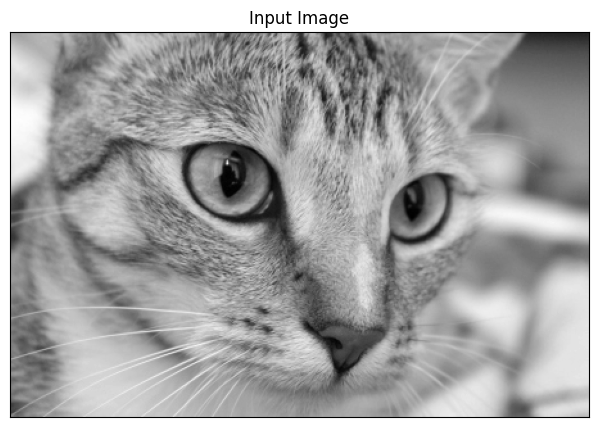

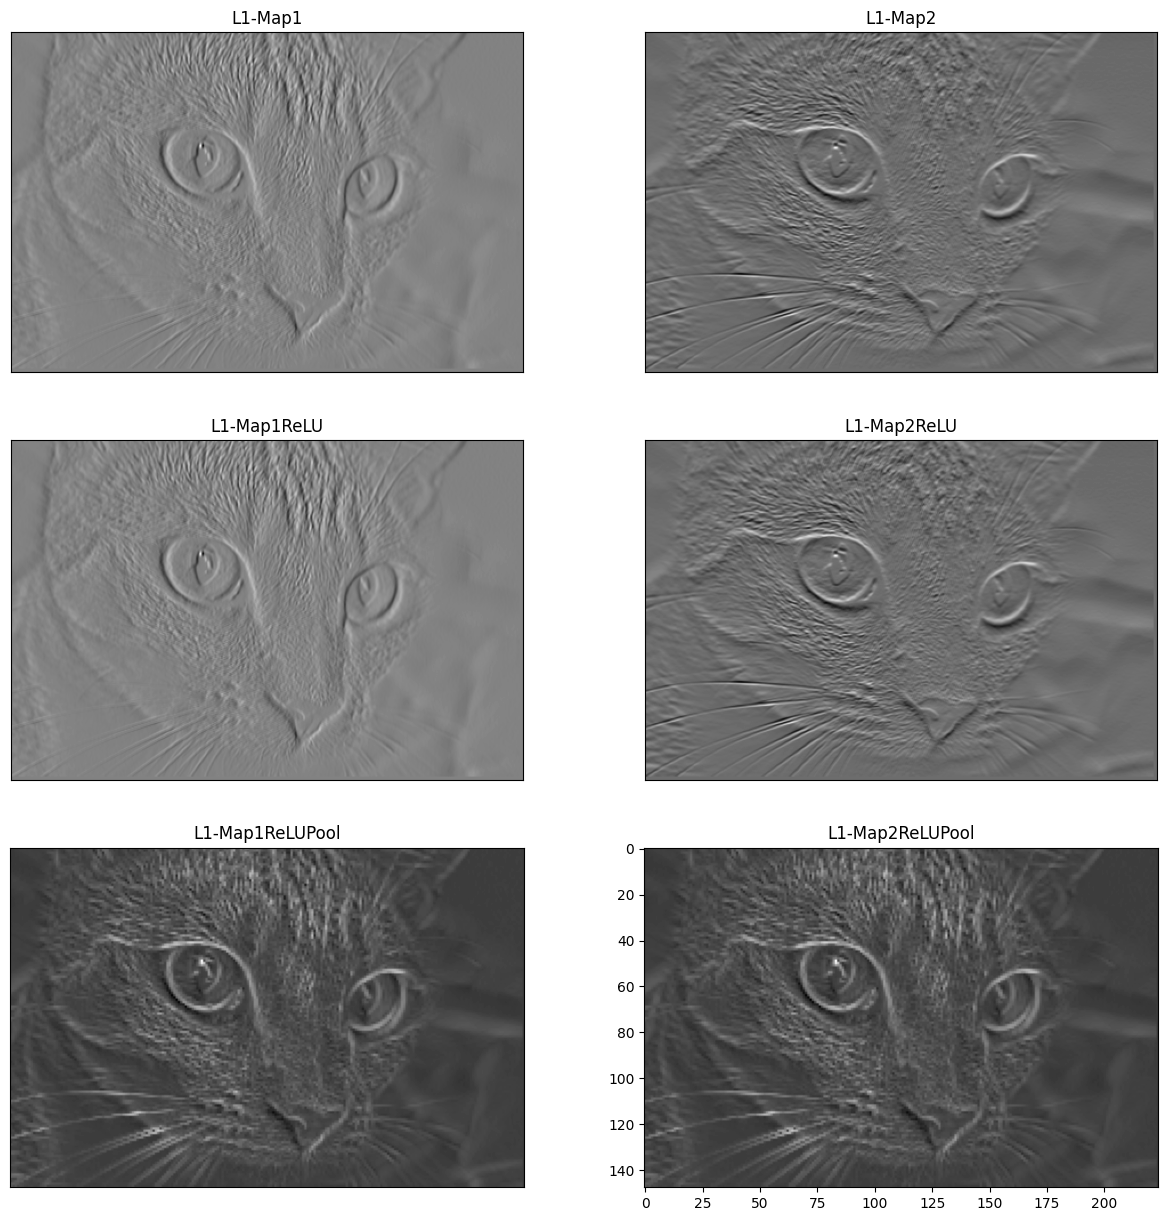

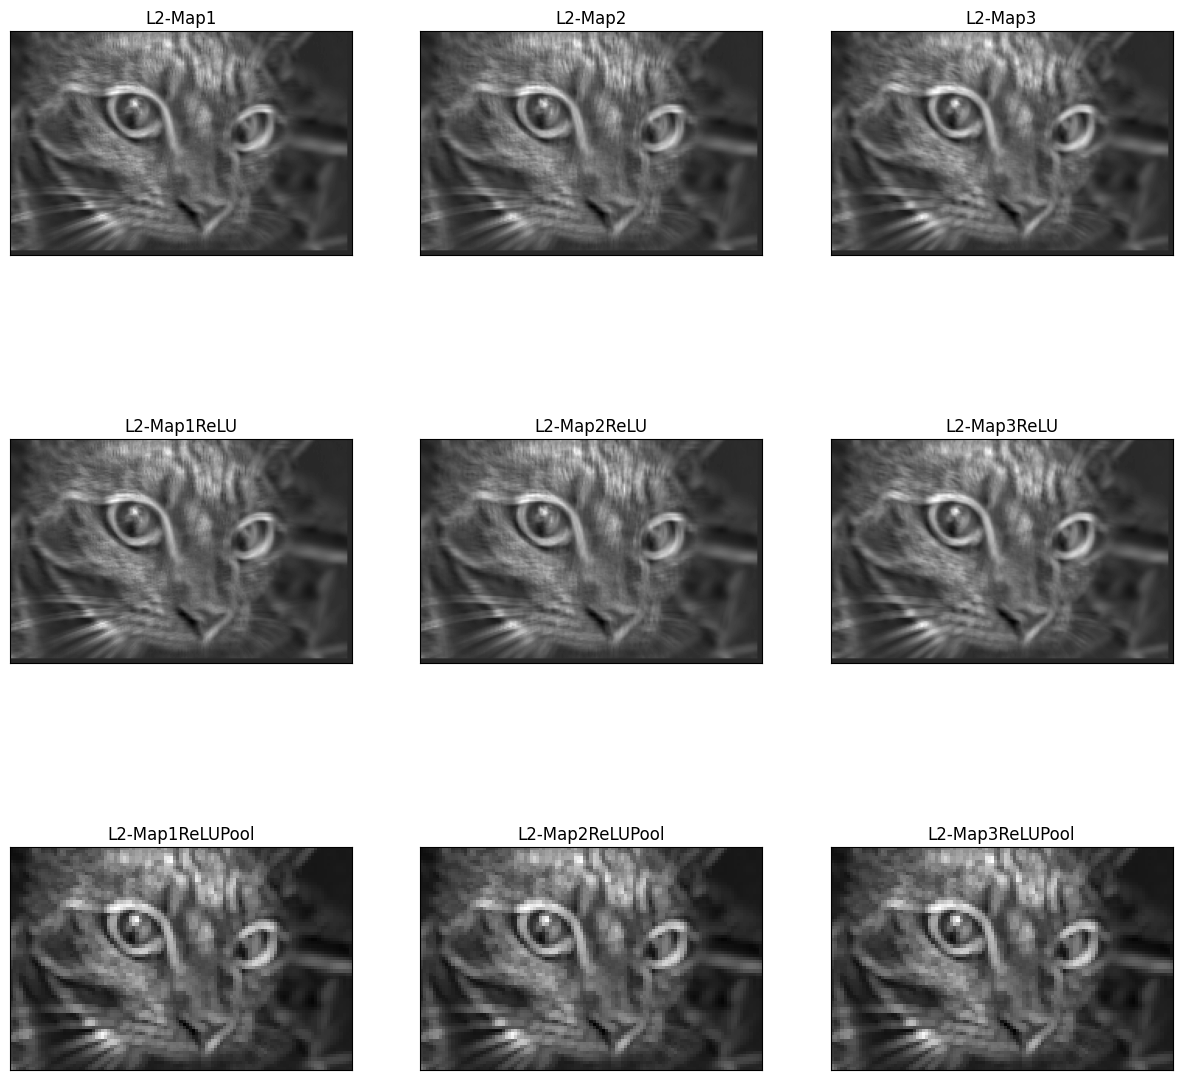

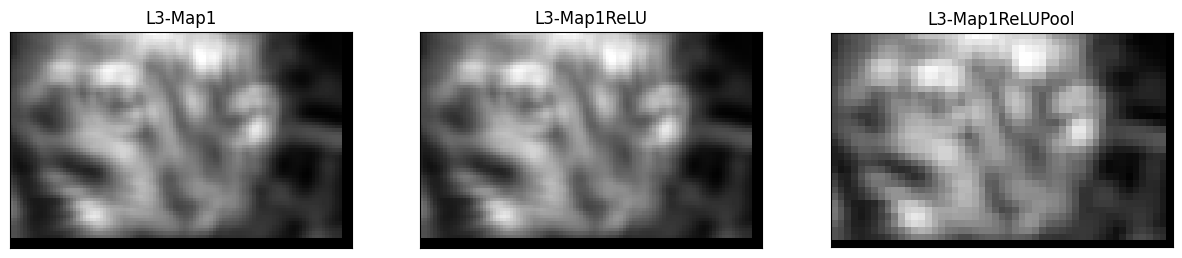

In [13]:
# Graphing results
fig0, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
ax0.imshow(img).set_cmap("gray")
ax0.set_title("Input Image")
ax0.get_xaxis().set_ticks([])
ax0.get_yaxis().set_ticks([])
plt.savefig("Images/Problem_4/Input_Image.pdf", bbox_inches="tight")

# Layer 1
fig1, ax1 = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
ax1[0, 0].imshow(l1_feature_map[:, :, 0]).set_cmap("gray")
ax1[0, 0].get_xaxis().set_ticks([])
ax1[0, 0].get_yaxis().set_ticks([])
ax1[0, 0].set_title("L1-Map1")

ax1[0, 1].imshow(l1_feature_map[:, :, 1]).set_cmap("gray")
ax1[0, 1].get_xaxis().set_ticks([])
ax1[0, 1].get_yaxis().set_ticks([])
ax1[0, 1].set_title("L1-Map2")

ax1[1, 0].imshow(l1_feature_map_relu[:, :, 0]).set_cmap("gray")
ax1[1, 0].get_xaxis().set_ticks([])
ax1[1, 0].get_yaxis().set_ticks([])
ax1[1, 0].set_title("L1-Map1ReLU")

ax1[1, 1].imshow(l1_feature_map_relu[:, :, 1]).set_cmap("gray")
ax1[1, 1].get_xaxis().set_ticks([])
ax1[1, 1].get_yaxis().set_ticks([])
ax1[1, 1].set_title("L1-Map2ReLU")

ax1[2, 0].imshow(l1_feature_map_relu_pool[:, :, 0]).set_cmap("gray")
ax1[2, 0].get_xaxis().set_ticks([])
ax1[2, 0].get_yaxis().set_ticks([])
ax1[2, 0].set_title("L1-Map1ReLUPool")

ax1[2, 1].imshow(l1_feature_map_relu_pool[:, :, 1]).set_cmap("gray")
ax1[2, 0].get_xaxis().set_ticks([])
ax1[2, 0].get_yaxis().set_ticks([])
ax1[2, 1].set_title("L1-Map2ReLUPool")

plt.savefig("Images/Problem_4/Layer_1.pdf", bbox_inches="tight")

# Layer 2
fig2, ax2 = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
ax2[0, 0].imshow(l2_feature_map[:, :, 0]).set_cmap("gray")
ax2[0, 0].get_xaxis().set_ticks([])
ax2[0, 0].get_yaxis().set_ticks([])
ax2[0, 0].set_title("L2-Map1")

ax2[0, 1].imshow(l2_feature_map[:, :, 1]).set_cmap("gray")
ax2[0, 1].get_xaxis().set_ticks([])
ax2[0, 1].get_yaxis().set_ticks([])
ax2[0, 1].set_title("L2-Map2")

ax2[0, 2].imshow(l2_feature_map[:, :, 2]).set_cmap("gray")
ax2[0, 2].get_xaxis().set_ticks([])
ax2[0, 2].get_yaxis().set_ticks([])
ax2[0, 2].set_title("L2-Map3")

ax2[1, 0].imshow(l2_feature_map_relu[:, :, 0]).set_cmap("gray")
ax2[1, 0].get_xaxis().set_ticks([])
ax2[1, 0].get_yaxis().set_ticks([])
ax2[1, 0].set_title("L2-Map1ReLU")

ax2[1, 1].imshow(l2_feature_map_relu[:, :, 1]).set_cmap("gray")
ax2[1, 1].get_xaxis().set_ticks([])
ax2[1, 1].get_yaxis().set_ticks([])
ax2[1, 1].set_title("L2-Map2ReLU")

ax2[1, 2].imshow(l2_feature_map_relu[:, :, 2]).set_cmap("gray")
ax2[1, 2].get_xaxis().set_ticks([])
ax2[1, 2].get_yaxis().set_ticks([])
ax2[1, 2].set_title("L2-Map3ReLU")

ax2[2, 0].imshow(l2_feature_map_relu_pool[:, :, 0]).set_cmap("gray")
ax2[2, 0].get_xaxis().set_ticks([])
ax2[2, 0].get_yaxis().set_ticks([])
ax2[2, 0].set_title("L2-Map1ReLUPool")

ax2[2, 1].imshow(l2_feature_map_relu_pool[:, :, 1]).set_cmap("gray")
ax2[2, 1].get_xaxis().set_ticks([])
ax2[2, 1].get_yaxis().set_ticks([])
ax2[2, 1].set_title("L2-Map2ReLUPool")

ax2[2, 2].imshow(l2_feature_map_relu_pool[:, :, 2]).set_cmap("gray")
ax2[2, 2].get_xaxis().set_ticks([])
ax2[2, 2].get_yaxis().set_ticks([])
ax2[2, 2].set_title("L2-Map3ReLUPool")

plt.savefig("Images/Problem_4/Layer_2.pdf", bbox_inches="tight")

# Layer 3
fig3, ax3 = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax3[0].imshow(l3_feature_map[:, :, 0]).set_cmap("gray")
ax3[0].get_xaxis().set_ticks([])
ax3[0].get_yaxis().set_ticks([])
ax3[0].set_title("L3-Map1")

ax3[1].imshow(l3_feature_map_relu[:, :, 0]).set_cmap("gray")
ax3[1].get_xaxis().set_ticks([])
ax3[1].get_yaxis().set_ticks([])
ax3[1].set_title("L3-Map1ReLU")

ax3[2].imshow(l3_feature_map_relu_pool[:, :, 0]).set_cmap("gray")
ax3[2].get_xaxis().set_ticks([])
ax3[2].get_yaxis().set_ticks([])
ax3[2].set_title("L3-Map1ReLUPool")

plt.savefig("Images/Problem_4/Layer_3.pdf", bbox_inches="tight")